In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../out/build/x64-Release/output/RelativeL2Luminance_Adam_0.010000_0.990000_0_0_64_6_16_14_4_4_1.000000_1_1_0.000000_32/logNrc.txt', sep=" ", header=None)
data.columns = ["frame", "MSE", "rBias", "StdDev", "Loss"]

<Axes: xlabel='frame'>

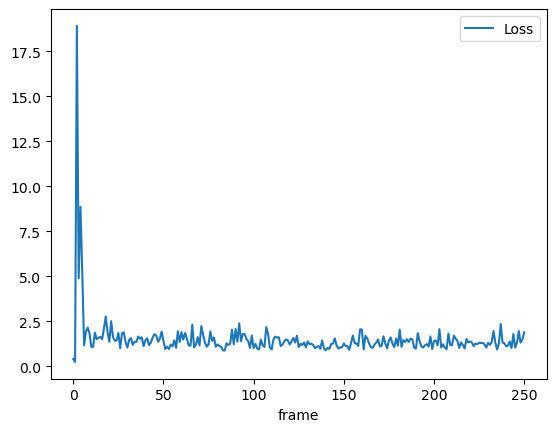

In [10]:
data.plot.line(x='frame', y='Loss')

In [5]:
dataSlice = data[:50]

<Axes: xlabel='frame'>

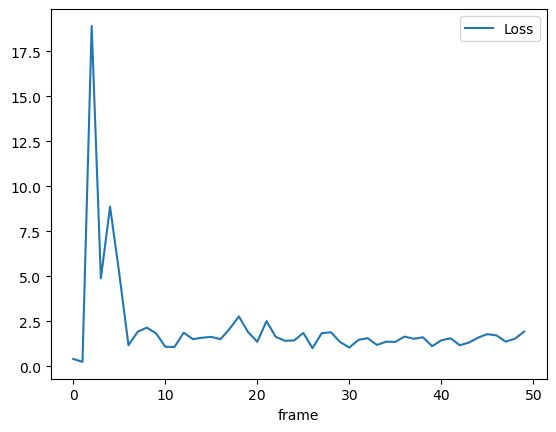

In [6]:
dataSlice.plot.line(x='frame', y='Loss')